In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
%matplotlib inline
from IPython.display import Image, HTML
import ast

In [2]:
movie_file = "Resources/movies_metadata.csv"
movie_df = pd.read_csv(movie_file)
movie_df.head() 

/Users/theriotn95/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# Create a filtered dataframe from specific columns
movies_cols = [ "imdb_id","title", "budget", "revenue","production_companies","popularity" ]
movies_df= movie_df[movies_cols].copy()


movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['budget'] = movies_df['budget'].replace(0, np.nan)
movies_df[movies_df['budget'].isnull()].shape

movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['revenue'] = movies_df['revenue'].replace(0, np.nan)
movies_df[movies_df['revenue'].isnull()].shape

# Clean the data by dropping duplicates and setting the index
movies_df.drop_duplicates("title", inplace=True)
movies_df['imdb_id'] = movies_df['imdb_id'].str[3:]
movies_df=movies_df.rename(columns={'imdb_id':'imdbId'})

cleaned_df = movies_df.dropna()
cleaned_df['imdbId'] = cleaned_df['imdbId'].astype('int64')


cleaned_df.head()

/Users/theriotn95/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,imdbId,title,budget,revenue,production_companies,popularity
0,114709,Toy Story,30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",21.9469
1,113497,Jumanji,65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",17.0155
3,114885,Waiting to Exhale,16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...,3.85949
5,113277,Heat,60000000.0,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {...",17.9249
8,114576,Sudden Death,35000000.0,64350171.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",5.23158


In [4]:
disneydata =pd.read_csv('Resources/disney_movies.csv', parse_dates=['release_date'])
disneydata=disneydata.rename(columns={'movie_title':'title'})

disneydata

,title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [5]:
rating_file = "Resources/ratings_small.csv"
rating_df = pd.read_csv(rating_file)
rating_df.head() 

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
link_file = "Resources/links_small.csv"
link_df = pd.read_csv(link_file)
link_df.head() 

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
# Create a filtered dataframe from specific columns
ratings_cols = ["movieId","rating"]
ratings_df= rating_df[ratings_cols].copy()

ratings_df.set_index("movieId", inplace=True)

ratings_df.head()

,rating
movieId,
31,2.5
1029,3.0
1061,3.0
1129,2.0
1172,4.0


In [8]:
# Create a filtered dataframe from specific columns
links_cols = ["movieId","imdbId"]
links_df= link_df[links_cols].copy()

links_df.set_index("movieId", inplace=True)

links_df.head()

,imdbId
movieId,
1,114709
2,113497
3,113228
4,114885
5,113041


In [9]:
imdbratings_df = pd.merge(ratings_df, links_df, on='movieId', how='inner')
# Need to reset combined_df index to imdb_id and drop tt letters in front of other imdb_id to combine
imdbratings_df

,rating,imdbId
movieId,,
31,2.5,112792
31,3.0,112792
31,4.0,112792
31,4.0,112792
31,3.0,112792
...,...,...
64997,2.5,449040
72380,3.5,362478
129,3.0,114131


In [10]:

avg_ratings = imdbratings_df.groupby('imdbId', as_index=False)['rating'].mean()

avg_ratings.head()


 


,imdbId,rating
0,417,4.333333
1,4972,3.000000
2,6333,3.500000
3,8133,4.250000
4,9018,4.250000


In [11]:
#merge all the tables find final dataframe
final_movies_df = pd.merge(cleaned_df, avg_ratings, on='imdbId', how='inner')

final_movies_df

,imdbId,title,budget,revenue,production_companies,popularity,rating
0,114709,Toy Story,30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",21.9469,3.872470
1,113497,Jumanji,65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",17.0155,3.401869
2,114885,Waiting to Exhale,16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...,3.85949,2.384615
3,113277,Heat,60000000.0,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {...",17.9249,3.884615
4,114576,Sudden Death,35000000.0,64350171.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",5.23158,3.150000
...,...,...,...,...,...,...,...
2866,810819,The Danish Girl,15000000.0,64191523.0,"[{'name': 'Pretty Pictures', 'id': 8875}, {'na...",11.2457,4.000000
2867,475290,"Hail, Caesar!",22000000.0,63647656.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",11.241366,3.000000
2868,142232,Heropanti,4200000.0,10000000.0,"[{'name': 'Nadiadwala Grandsons', 'id': 1576}]",2.031919,3.500000
2869,918940,The Legend of Tarzan,180000000.0,356743061.0,"[{'name': 'Village Roadshow Pictures', 'id': 7...",45.38298,2.500000


In [12]:

#df = pd.concat([movies_df, pd.DataFrame(list(movies_df['production_companies'])).fillna(0).astype(int)], axis=1)
#df_pollutants = pd.DataFrame(movies_df['production_companies'].values.tolist(), index= movies_df.index)
#df1 = pd.concat([pd.DataFrame(x) for x in movies_df['production_companies']], keys= movies_df.index).reset_index(level=1,drop=True)
#df = df.drop('', axis=1).join(df1).reset_index(drop=True)

In [13]:
import ast 

#print(ast.literal_eval(movies_df['production_companies'][0]))
    
    
for p in ast.literal_eval(movies_df['production_companies'][2]):
    
    for key,value in p.items():
        
            print(value)
        
    
   

Warner Bros.
6194
Lancaster Gate
19464


In [14]:
# Sort data by the adjusted gross in descending order 
inflation_adjusted_gross_desc = disneydata.sort_values(by='inflation_adjusted_gross', ascending=False) 

# Display the top 10 movies 
inflation_adjusted_gross_desc.head(10)


,title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


In [15]:
# Extract year from release_date and store it in a new column
disneydata['release_year'] = pd.DatetimeIndex(disneydata['release_date']).year

# Compute mean of adjusted gross per genre and per year
group = disneydata.groupby(['genre','release_year']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = group.reset_index()

# Inspect genre_yearly 
genre_yearly.head(10)

,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.0
1,Action,1982,26918576.0,77184895.0
2,Action,1988,17577696.0,36053517.0
3,Action,1990,59249588.5,118358772.0
4,Action,1991,28924936.5,57918572.5
5,Action,1992,29028000.0,58965304.0
6,Action,1993,21943553.5,44682157.0
7,Action,1994,19180582.0,39545796.0
8,Action,1995,63037553.5,122162426.5
9,Action,1996,135281096.0,257755262.5


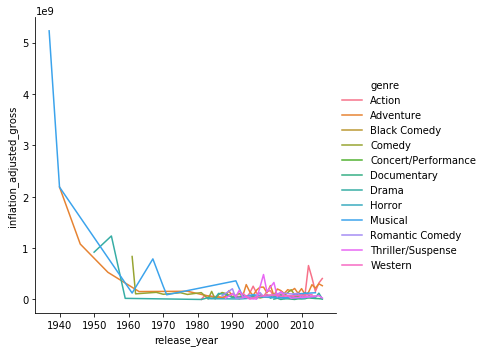

In [16]:
import seaborn as sns

# Plot inflation  
sns_plot = sns.relplot(kind='line', x='release_year', y='inflation_adjusted_gross', hue='genre', data=genre_yearly)

sns_plot.savefig("images/grossperyear.png")

In [17]:
disney_df = pd.merge(final_movies_df, disneydata, on='title', how='inner')
disney_df

,imdbId,title,budget,revenue,production_companies,popularity,rating,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,114709,Toy Story,30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",21.9469,3.872470,1995-11-22,Adventure,G,191796233,370409631,1995
1,113987,Nixon,44000000.0,13681765.0,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",5.092,3.451613,1995-12-20,Drama,R,13668249,26302005,1995
2,114148,Pocahontas,55000000.0,346079773.0,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",13.2801,2.926230,1995-06-10,Adventure,G,141579773,274370957,1995
3,118158,White Squall,38000000.0,10300000.0,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",9.5686,3.764706,1996-02-02,Adventure,PG-13,10229300,19509726,1996
4,112740,Crimson Tide,53000000.0,157387195.0,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",8.65736,3.831250,1995-05-12,Action,R,91387195,177102077,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,398286,Tangled,260000000.0,591794936.0,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",14.6848,3.666667,2010-11-24,Adventure,PG,200821936,214388548,2010
216,433035,Real Steel,110000000.0,299268508.0,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...",19.2656,3.000000,2011-10-07,Action,PG-13,85463309,90848019,2011
217,401729,John Carter,260000000.0,284139100.0,"[{'name': 'Walt Disney Pictures', 'id': 2}]",14.6704,2.937500,2012-03-09,Adventure,PG-13,73058679,77372445,2012
218,443272,Lincoln,65000000.0,275293450.0,"[{'name': 'DreamWorks', 'id': 7}, {'name': 'Am...",10.6803,3.428571,2012-11-09,Drama,PG-13,182207973,192122330,2012


In [18]:
nRow, nCol = disney_df.shape
print(f'There are {nRow} rows and {nCol} columns')
#rds_connection_string = "<insert user name>:<insert password>@localhost:5432/customer_db"
#engine = create_engine(f'postgresql://{rds_connection_string}')


There are 220 rows and 13 columns


<h3>Are there certain words that occur more often in Movie Titles and Movie Blurbs ?</h3>

<h4>Conclusion :- </h4>
<p> The word Love is the most commonly used word in movie titles. Girl, Day and Man are also among the most commonly occuring words. I think this tells us the presence of romance in movies pretty well.
</p>
<p>
Life is the most commonly used word in Movie titles. One and Find are also popular in Movie Blurbs. so  most popular themes present in movies are <b>love,Girl,Life.</b>
</p>

In [19]:
movies= pd.read_csv('Resources/movies_metadata.csv')
movies.head().transpose()


/Users/theriotn95/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [20]:
movies['title'] = movies['title'].astype('str')
movies['overview'] = movies['overview'].astype('str')

In [21]:
title_corpus = ' '.join(movies['title'])
overview_corpus = ' '.join(movies['overview'])

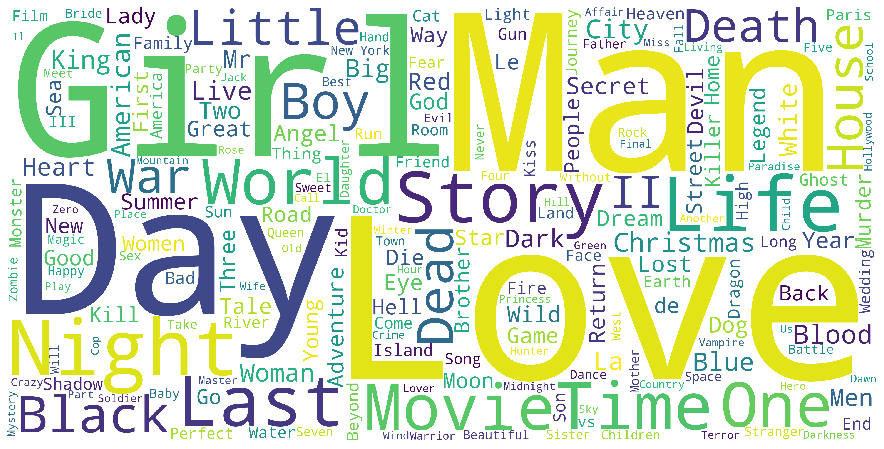

In [22]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()
title_wordcloud.to_file('Images/cloud1.png')

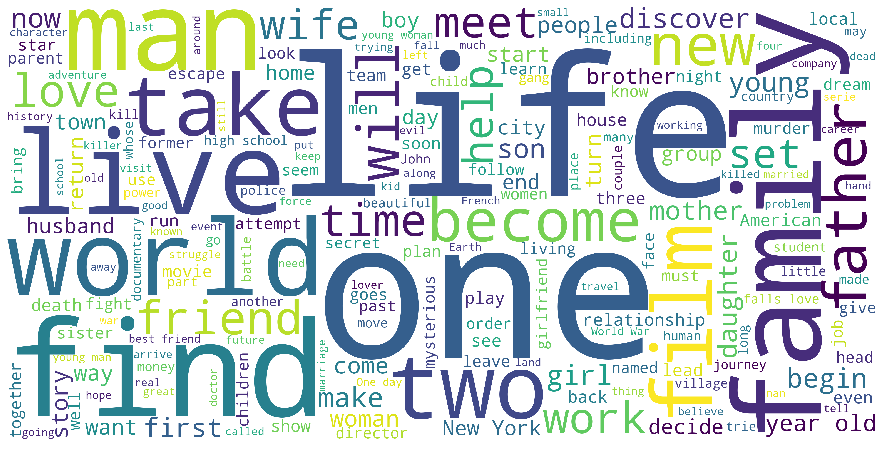

In [23]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()
overview_wordcloud.to_file('Images/wordcloud2.png')

<h3> Most Critically Acclaimed Movies</h3>
<h4>conclusion</h4>

<p> The Shawshank Redemption and The Godfather are the two most critically acclaimed movies</p>

In [24]:
r=movies[movies['vote_count'] > 2000][['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(10)
r

,title,vote_average,vote_count
314,The Shawshank Redemption,8.5,8358.0
834,The Godfather,8.5,6024.0
2211,Life Is Beautiful,8.3,3643.0
5481,Spirited Away,8.3,3968.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
1176,Psycho,8.3,2405.0
2843,Fight Club,8.3,9678.0
1178,The Godfather: Part II,8.3,3418.0
12481,The Dark Knight,8.3,12269.0
292,Pulp Fiction,8.3,8670.0


<h3> Original Language </h3>
<h4> majority of the movies in the dataset are English. </h4>
<h4>Conclusion </h4>
  <p> therefore French and Italian are the most commonly occurring languages after English. Japanese and Hindi form the majority for  Asian </p>

In [25]:
movies['original_language'].drop_duplicates().shape[0]

93

In [26]:
language_data = pd.DataFrame(movies['original_language'].value_counts())
language_data['language'] = language_data.index
language_data.columns = ['number', 'language']
language_data.head()


,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


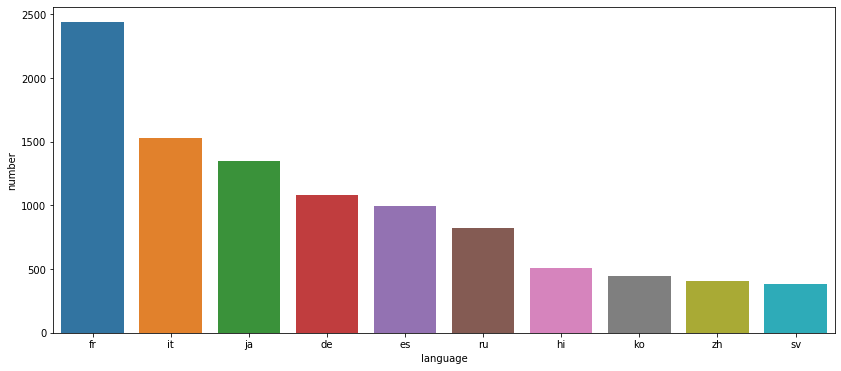

In [27]:
plt.figure(figsize=(14,6))
sns.barplot(x='language', y='number', data=language_data.iloc[1:11])
plt.savefig('Images/language.png')
plt.show()


<h3>Actors and directors with highest revenue!</h3>

In [28]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [33]:

movies['id'] = movies['id'].apply(convert_int)
movies[movies['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN


In [34]:
df = df.drop([19730, 29503, 35587])
df['id'] = df['id'].astype('int')

KeyError: '[19730 29503 35587] not found in axis'

In [35]:
credit_file = "Resources/credits.csv"
credit_df = pd.read_csv(credit_file)
 
df = movies.merge(credit_df, on='id')
df.shape

(45538, 26)

In [36]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [37]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [38]:
df['director'] = df['crew'].apply(get_director)

/Users/theriotn95/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


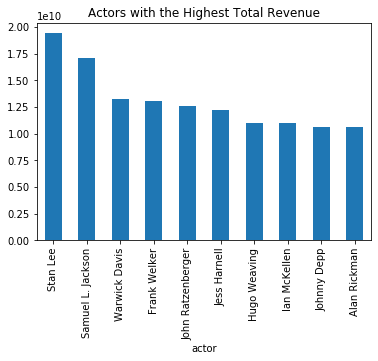

In [39]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)


plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('Images/actors.png')
plt.show()



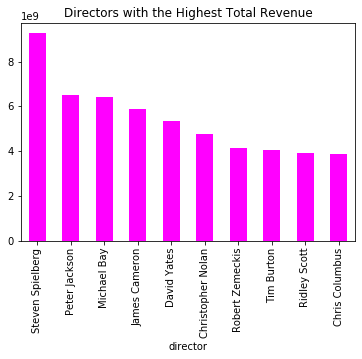

In [40]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='spring')
plt.savefig('Images/director.png')
plt.show()

